In [1]:
import numpy as np
import re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import glob

In [2]:
# Use glob to find all files matching the pattern 'hv_vs_effi/logs/*log*.txt'
logs = glob.glob('logfiles/*.log')

# Initialize a dictionary 'effis' to store efficiency-related data
effis = {'Efficiency': [], 'Err+': [], 'Err-':[], 'Bias':[]}

run_map_file = '/home/harald/Desktop/MPW4/desy_04_24/output/nikhef_backside/scan_mapping.csv'
output_file = '/home/harald/Desktop/MPW4/desy_04_24/output/nikhef_backside/effi_vs_hv.png'
plot_title = 'Efficiency vs. Threshold'
x_label ='Threshold [mV]'
run_map = {}

list1 = np.arange(308, 318)

list2 = np.arange(322, 332)

runs_to_analyse = np.concatenate((list1, list2))

logs.sort()
filesToRemove = []
for r in logs:
    match = re.search(r'analysis_jobsub_(\d+)', r)
    if match:
        runNmb = int(match.group(1))
        if not (runNmb in runs_to_analyse):
            filesToRemove.append(r)
    else:
        filesToRemove.append(r)

for f in filesToRemove:
    logs.remove(f)

with open(run_map_file) as f:
    for line in f:
        if line.startswith('#'):
            continue
        run, para = line.split(',')
        run = int(run)
        para = abs(float(para))
        run_map[run] = para

run_map


{308: 20.0,
 309: 18.0,
 310: 16.0,
 311: 14.0,
 312: 12.0,
 313: 10.0,
 314: 8.0,
 315: 6.0,
 316: 4.0,
 317: 2.0,
 322: 500.0,
 323: 450.0,
 324: 400.0,
 325: 350.0,
 326: 300.0,
 327: 250.0,
 328: 200.0,
 329: 150.0,
 330: 100.0,
 331: 50.0}

In [3]:
logs.sort()

# Loop through each file found by glob
for f in logs:
    with open(f) as log:  # Open the file for reading
        for line in log:  # Loop through each line in the file

            # Use regular expressions to search for a pattern in the line
            # Explanation of the regex pattern:
            # (?<=Total efficiency ) - Positive lookbehind for "Total efficiency "
            # .+ - Match one or more of any character (except newline)
            # (\d\d\.\d+) - Capture a numerical value in the format of two digits, a dot, and one or more digits (Efficiency)
            # \(.(0.\d+) .(0.\d+)' - Capture two numerical values in parentheses (Err+ and Err-)
            match = re.search(r'(?<=Total efficiency )(.+(\d\d\.\d+)\(.(0.\d+) .(0.\d+))', line)
            #print(match)
            
            if not match:
                continue  # If no match is found, skip to the next line

            runNmb = int(re.search(r'analysis_jobsub_(\d+)', f).group(1))
            # Extract and store data based on the regular expression groups
            effis['Bias'].append(run_map[runNmb])  # Extract 'Bias' from the file name
            effis['Efficiency'].append(float(match.group(2)))  # Extract 'Efficiency' value
            effis['Err+'].append(float(match.group(3)))  # Extract 'Err+' value
            effis['Err-'].append(float(match.group(4)))  # Extract 'Err-' value

df = pd.DataFrame(effis)
df

,Efficiency,Err+,Err-,Bias
0,95.8088,0.029583,0.029783,20.0
1,94.3400,0.034213,0.034408,18.0
2,92.4059,0.039193,0.039379,16.0
3,89.2244,0.045651,0.045821,14.0
4,84.4189,0.053301,0.053449,12.0
5,77.1863,0.061404,0.061520,10.0
6,66.8423,0.068720,0.068791,8.0
7,53.5857,0.073361,0.073377,6.0
8,38.1652,0.071436,0.071385,4.0
9,22.9330,0.062091,0.061974,2.0


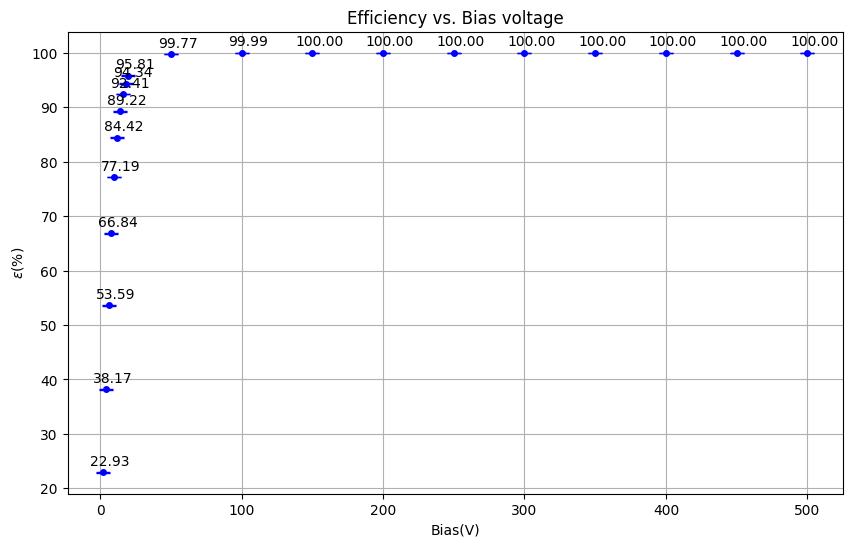

In [4]:
df = df.sort_values(by='Bias')

# Create the scatter plot with error bars
plt.figure(figsize=(10, 6))
plt.errorbar(df['Bias'], df['Efficiency'], yerr=[df['Err-'], df['Err+']], fmt='.', color='blue', markersize=8, capsize=5, label='Efficiency with Error Bars')

plt.xlabel('Bias(V)')
plt.ylabel(r'$\epsilon$(%)')
plt.title('Efficiency vs. Bias voltage')
plt.grid(True)

# Annotate data points with Bias values
for i, row in df.iterrows():
    plt.annotate(f'{row["Efficiency"]:.2f}', (row['Bias'], row['Efficiency']), textcoords="offset points", xytext=(5,5), ha='center')

# Show the plot
plt.savefig(output_file)
plt.show()


/tmp/ipykernel_12721/3543193499.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Bias', y='Efficiency', data=df, palette='Blues')


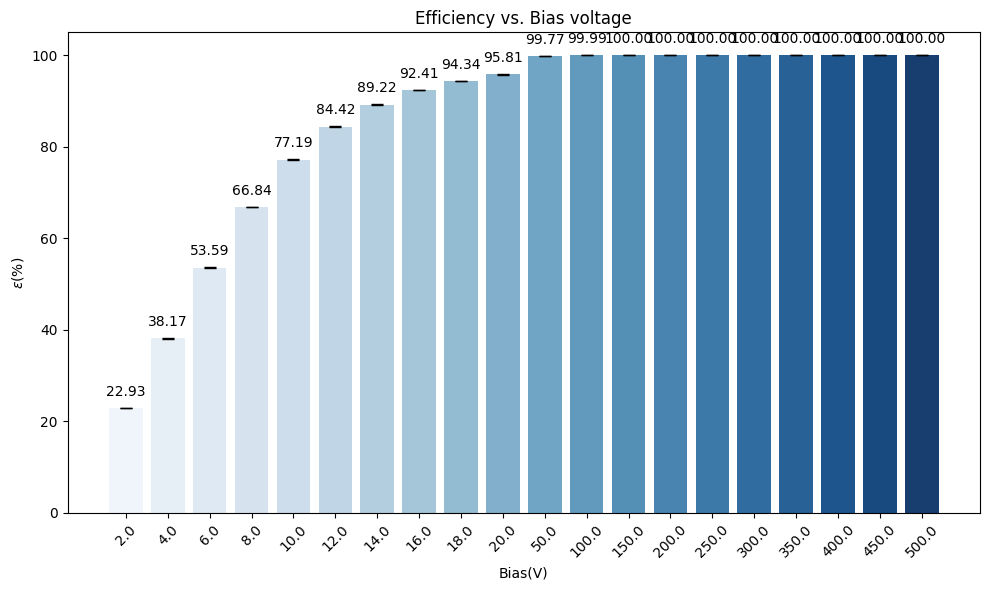

In [5]:
df = df.sort_values(by='Bias')

# Create the plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Bias', y='Efficiency', data=df, palette='Blues')
plt.errorbar(
    x=range(len(df)),
    y=df['Efficiency'],
    yerr=[df['Err-'], df['Err+']],
    fmt='none',
    capsize=4,
    color='black',
)

plt.xlabel('Bias(V)')
plt.ylabel(r'$\epsilon$(%)')
plt.title('Efficiency vs. Bias voltage')
plt.xticks(rotation=45)
plt.tight_layout()

# Annotate the bars with Efficiency values
for i, v in enumerate(df['Efficiency']):
    ax.text(i, v + 2, f'{v:.2f}', ha='center', va='bottom', fontsize=10)

# Show the plot
plt.show()